In [1]:
import pandas as pd

In [5]:
train = pd.read_csv('../../data/new/진짜최종데이터/real_train.csv', index_col='Unnamed: 0')
train

,업종명,평가연도,총자산규모(Size),부채비율(DEB),자기자본비율(DEB),매출액증가율,현금흐름(CF),PBR,ESG_A,ESG_A+,...,S_B+,S_C,S_D,G_A,G_A+,G_B,G_B+,G_C,G_D,배당기업구분
신세계인터내셔날,유통업,2017,9.508566e+11,91.63,52.18,7.97,0.012577,1.140,False,False,...,False,False,False,False,False,True,False,False,False,일반배당기업
현대비앤지스틸,철강금속,2021,7.687519e+11,54.45,64.75,25.79,0.021545,0.595,True,False,...,False,False,False,False,False,False,True,False,False,일반배당기업
미원상사,화학,2021,3.724137e+11,25.82,79.48,21.97,0.153081,3.290,False,False,...,False,True,False,False,False,True,False,False,False,일반배당기업
오리온홀딩스,기타금융,2021,4.961788e+12,28.18,78.01,0.00,0.184880,0.540,True,False,...,False,False,False,True,False,False,False,False,False,고배당기업
삼천리,전기가스업,2022,5.021952e+12,226.25,30.65,53.83,0.049893,0.765,False,False,...,True,False,False,False,False,False,False,True,False,고배당기업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
한화,화학,2013,1.133226e+14,951.62,9.51,236.65,0.165376,1.060,False,False,...,False,False,False,False,False,False,True,False,False,일반배당기업
대우조선해양,운수장비,2021,1.062321e+13,379.04,20.87,-36.18,0.108275,1.595,True,False,...,False,False,False,True,False,False,False,False,False,무배당기업
아세아제지,종이목재,2015,6.545622e+11,48.62,67.29,-2.88,0.022846,0.555,False,False,...,False,False,False,False,False,True,False,False,False,무배당기업
코스모화학,화학,2017,4.548359e+11,187.23,34.81,50.66,-0.080917,2.595,False,False,...,False,False,False,False,False,False,True,False,False,무배당기업


In [32]:
from scipy.stats import mstats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [16]:
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

In [18]:
#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

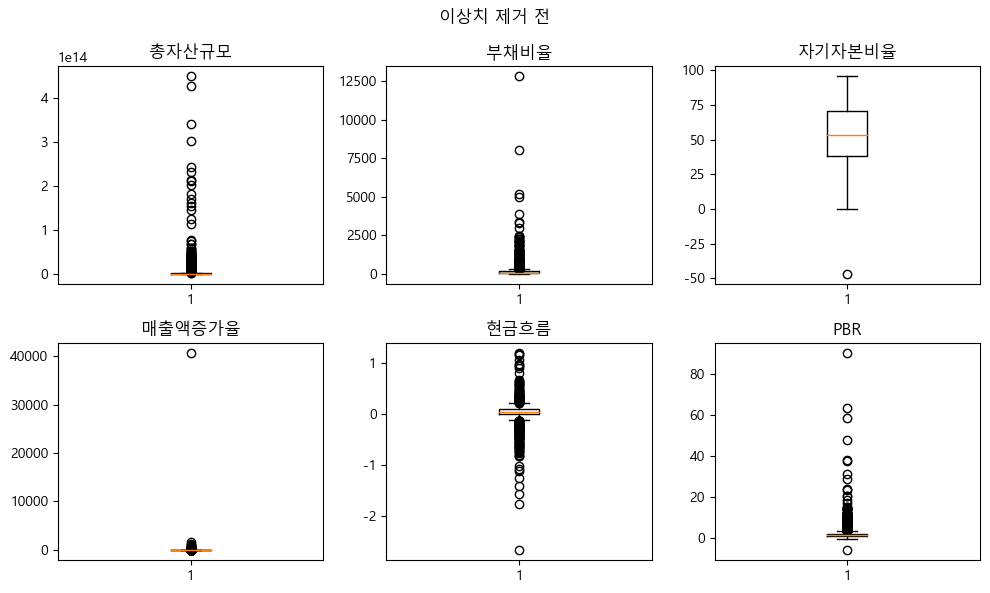

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))


# 각 서브플롯에 박스 플롯 그리기
axs[0, 0].boxplot(train['총자산규모(Size)'])
axs[0, 1].boxplot(train['부채비율(DEB)'])
axs[0, 2].boxplot(train['자기자본비율(DEB)'])
axs[1, 0].boxplot(train['매출액증가율'])
axs[1, 1].boxplot(train['현금흐름(CF)'])
axs[1, 2].boxplot(train['PBR'])

# 서브플롯 제목 설정
axs[0, 0].set_title('총자산규모')
axs[0, 1].set_title('부채비율')
axs[0, 2].set_title('자기자본비율')
axs[1, 0].set_title('매출액증가율')
axs[1, 1].set_title('현금흐름')
axs[1, 2].set_title('PBR')

# 전체 그래프 제목 설정
fig.suptitle('이상치 제거 전')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

> 이상치 제거

In [40]:
train_1 = train.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4f49475b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4f4947af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4f4947430>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4f4980070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4f4980310>],
 'means': []}

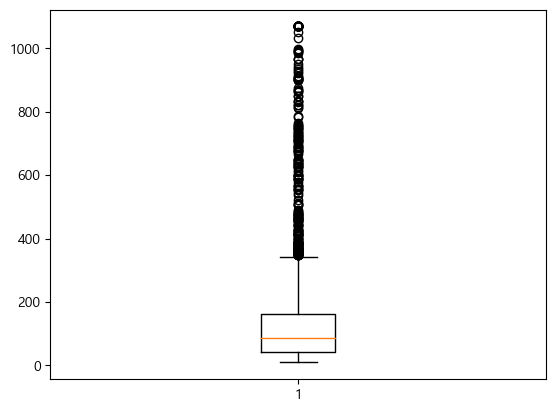

In [41]:
train_1['부채비율(DEB)'] = mstats.winsorize(train_1['부채비율(DEB)'].values, limits=[0.01, 0.015])
plt.boxplot(train_1['부채비율(DEB)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4f478e5f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4f478eb30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4f478e350>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4f478f070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4f478f310>],
 'means': []}

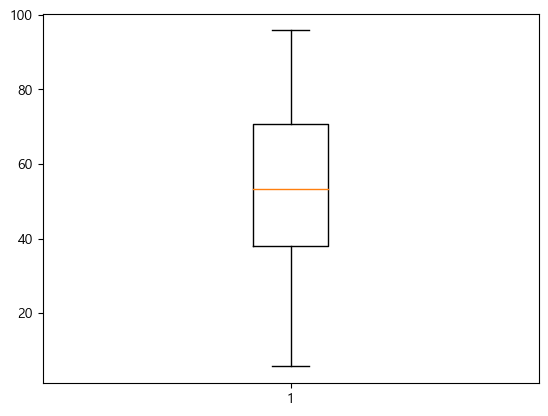

In [42]:
train_1['자기자본비율(DEB)'] = mstats.winsorize(train_1['자기자본비율(DEB)'].values, limits=[0.01, 0])
plt.boxplot(train_1['자기자본비율(DEB)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4f4818250>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4f4818790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4f47e7f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4f4818cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4f4818f70>],
 'means': []}

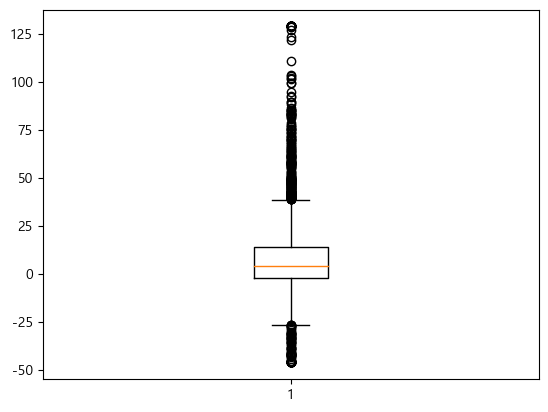

In [43]:
train_1['매출액증가율'] = mstats.winsorize(train_1['매출액증가율'].values, limits=[0.01, 0.01])
plt.boxplot(train_1['매출액증가율'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4f49bc130>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4f49bc670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4f485be50>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4f49bcbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4f49bce50>],
 'means': []}

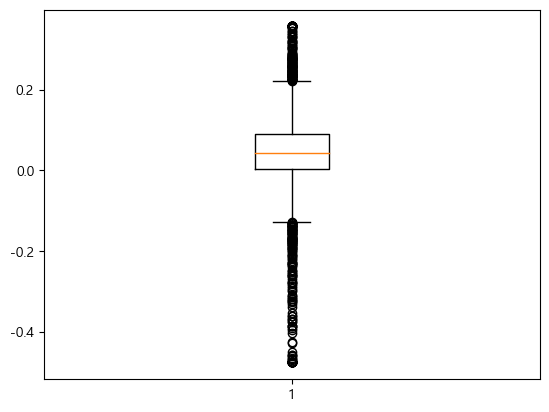

In [44]:
train_1['현금흐름(CF)'] = mstats.winsorize(train_1['현금흐름(CF)'].values, limits=[0.01, 0.01])
plt.boxplot(train_1['현금흐름(CF)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4f4a0d720>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4f4a0dc60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4f4a0d480>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4f4a0e1a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4f4a0e440>],
 'means': []}

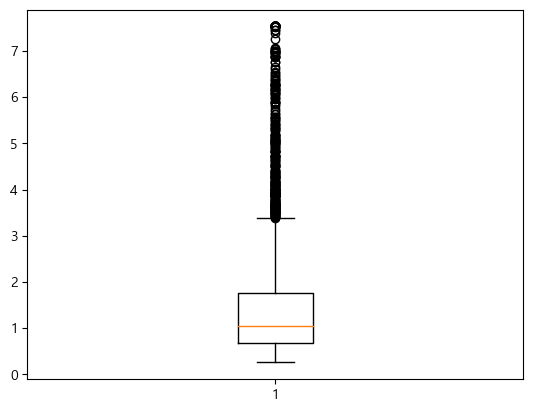

In [45]:
train_1['PBR'] = mstats.winsorize(train_1['PBR'].values, limits=[0.01, 0.02])
plt.boxplot(train_1['PBR'])

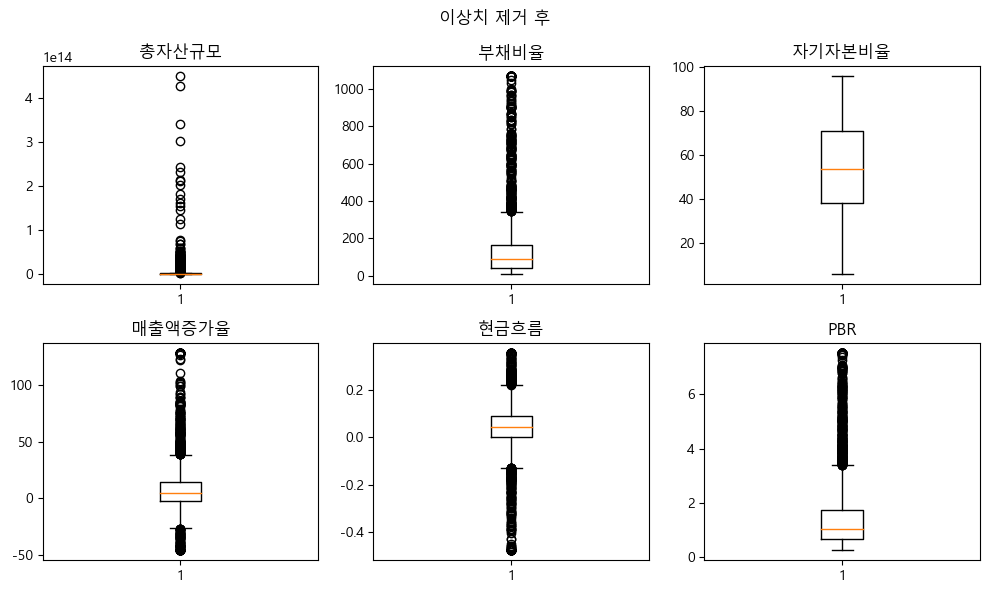

In [46]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))


# 각 서브플롯에 박스 플롯 그리기
axs[0, 0].boxplot(train_1['총자산규모(Size)'])
axs[0, 1].boxplot(train_1['부채비율(DEB)'])
axs[0, 2].boxplot(train_1['자기자본비율(DEB)'])
axs[1, 0].boxplot(train_1['매출액증가율'])
axs[1, 1].boxplot(train_1['현금흐름(CF)'])
axs[1, 2].boxplot(train_1['PBR'])

# 서브플롯 제목 설정
axs[0, 0].set_title('총자산규모')
axs[0, 1].set_title('부채비율')
axs[0, 2].set_title('자기자본비율')
axs[1, 0].set_title('매출액증가율')
axs[1, 1].set_title('현금흐름')
axs[1, 2].set_title('PBR')

# 전체 그래프 제목 설정
fig.suptitle('이상치 제거 후')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [48]:
train_1.columns

Index(['업종명', '평가연도', '총자산규모(Size)', '부채비율(DEB)', '자기자본비율(DEB)', '매출액증가율',
       '현금흐름(CF)', 'PBR', 'ESG_A', 'ESG_A+', 'ESG_B', 'ESG_B+', 'ESG_C',
       'ESG_D', 'E_A', 'E_A+', 'E_B', 'E_B+', 'E_C', 'E_D', 'S_A', 'S_A+',
       'S_B', 'S_B+', 'S_C', 'S_D', 'G_A', 'G_A+', 'G_B', 'G_B+', 'G_C', 'G_D',
       '배당기업구분'],
      dtype='object')

In [49]:
train_1.columns = ['업종명', '평가연도', '총자산규모', '부채비율', '자기자본비율', '매출액증가율',
       '현금흐름', 'PBR', 'ESG_A', 'ESG_A+', 'ESG_B', 'ESG_B+', 'ESG_C',
       'ESG_D', 'E_A', 'E_A+', 'E_B', 'E_B+', 'E_C', 'E_D', 'S_A', 'S_A+',
       'S_B', 'S_B+', 'S_C', 'S_D', 'G_A', 'G_A+', 'G_B', 'G_B+', 'G_C', 'G_D',
       '배당기업구분']

In [51]:
# train_1.to_csv('발표준비train.csv')

In [54]:
df = pd.read_csv('../../data/new/진짜최종데이터/발표준비_sca_train.csv', index_col=0)
df

,업종명,평가연도,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,ESG_A,ESG_A+,...,S_B+,S_C,S_D,G_A,G_A+,G_B,G_B+,G_C,G_D,배당기업구분
신세계인터내셔날,유통업,2017,27.580629,-0.282288,-0.050882,-0.006480,-0.260696,-0.278952,False,False,...,False,False,False,False,False,True,False,False,False,일반배당기업
현대비앤지스틸,철강금속,2021,27.368034,-0.480340,0.541067,0.775681,-0.180862,-0.648947,True,False,...,False,False,False,False,False,False,True,False,False,일반배당기업
미원상사,화학,2021,26.643271,-0.632848,1.234735,0.608012,0.990064,1.180662,False,False,...,False,True,False,False,False,True,False,False,False,일반배당기업
오리온홀딩스,기타금융,2021,29.232787,-0.620277,1.165509,-0.356302,1.273132,-0.686286,True,False,...,False,False,False,True,False,False,False,False,False,고배당기업
삼천리,전기가스업,2022,29.244840,0.434813,-1.064776,2.006421,0.071494,-0.533536,False,False,...,True,False,False,False,False,False,False,True,False,고배당기업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
한화,화학,2013,32.361260,4.298755,-2.060305,5.296590,1.099506,-0.333263,False,False,...,False,False,False,False,False,False,True,False,False,일반배당기업
대우조선해양,운수장비,2021,29.994062,1.248704,-1.525338,-1.944326,0.591205,0.029943,True,False,...,False,False,False,True,False,False,False,False,False,무배당기업
아세아제지,종이목재,2015,27.207232,-0.511396,0.660681,-0.482712,-0.169281,-0.676103,False,False,...,False,False,False,False,False,True,False,False,False,무배당기업
코스모화학,화학,2017,26.843203,0.226960,-0.868873,1.867283,-1.092968,0.708833,False,False,...,False,False,False,False,False,False,True,False,False,무배당기업


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
import pandas as pd

In [59]:
df = pd.read_csv('../../data/new/진짜최종데이터/발표준비_sca_train.csv', index_col=0)
lg_clf=LogisticRegression(multi_class='multinomial')

x=df.iloc[:,2:32].values
y=df['배당기업구분'].map({
    '고배당기업': 2,
    '일반배당기업':1,
    '무배당기업':0
})

X_train, X_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.2, random_state=0)

lg_clf.fit(X_train, y_train)
pred = lg_clf.predict(X_test)

params={
    'penalty':['l1','l2'],
    'C':[8.0, 10.0 ],
    'solver' : ['newton-cg', 'sag', 'lbfgs'],
    'max_iter':[300,500,1000]
}

grid=GridSearchCV(lg_clf,param_grid=params,scoring='accuracy',cv=3)
grid.fit(X_train,y_train)

print(f'최적 하이퍼 파라미터 : {grid.best_params_}, 최적 평균 정확도 : {grid.best_score_:.3f}')
print(classification_report(y_test,pred))

최적 하이퍼 파라미터 : {'C': 10.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}, 최적 평균 정확도 : 0.663
              precision    recall  f1-score   support

           0       0.66      0.46      0.54       195
           1       0.67      0.88      0.76       388
           2       0.51      0.19      0.28       101

    accuracy                           0.66       684
   macro avg       0.61      0.51      0.52       684
weighted avg       0.64      0.66      0.62       684



In [60]:
df = pd.read_csv('../../data/new/진짜최종데이터/발표준비_sca_train.csv', index_col=0)
lg_clf=LogisticRegression(multi_class='multinomial')

x=df.iloc[:,2:8].values
y=df['배당기업구분'].map({
    '고배당기업': 2,
    '일반배당기업':1,
    '무배당기업':0
})

X_train, X_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.2, random_state=0)

lg_clf.fit(X_train, y_train)
pred = lg_clf.predict(X_test)

params={
    'penalty':['l1','l2'],
    'C':[8.0, 10.0 ],
    'solver' : ['newton-cg', 'sag', 'lbfgs'],
    'max_iter':[300,500,1000]
}

grid=GridSearchCV(lg_clf,param_grid=params,scoring='accuracy',cv=3)
grid.fit(X_train,y_train)

print(f'최적 하이퍼 파라미터 : {grid.best_params_}, 최적 평균 정확도 : {grid.best_score_:.3f}')
print(classification_report(y_test,pred))

최적 하이퍼 파라미터 : {'C': 8.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}, 최적 평균 정확도 : 0.663
              precision    recall  f1-score   support

           0       0.73      0.38      0.50       195
           1       0.66      0.95      0.78       388
           2       0.62      0.18      0.28       101

    accuracy                           0.67       684
   macro avg       0.67      0.50      0.52       684
weighted avg       0.67      0.67      0.63       684

